In [115]:
import numpy as np
import matplotlib.pyplot as plt

In [116]:
def initialize_centroids(data, k):
 
    c = np.random.choice(data.shape[0], k )
    return data[c]

In [117]:
def nearest(datapoint ,centroid):
 
   distance = np.linalg.norm(datapoint-centroid,axis=1)
   nearest_c =  np.argmin(distance)

   return nearest_c



In [118]:
def mean(data):
    
    return np.mean(data,axis=0)


In [119]:

def kmeans(data, k):
    
    centroids = initialize_centroids(data, k)
    
    for _ in range(1000):
  
        labels = np.array([nearest(data_point, centroids) for data_point in data])
        new_c = np.array([mean(data[labels == i]) for i in range(k)])

        if np.all(new_c == centroids):
            break
        centroids = new_c
    
    return centroids, labels

In [120]:
nPerClust_SA = 100
C1 = [1,1]
C2 = [5,1]
C3 = [3,-2]
C4 = [4,4]
blur = 1
radius = np.array([0.8,0.8,0.8,0.8])
C1Data = np.array([C1[0]+radius[0]*np.random.randn(nPerClust_SA)*blur , C1[1]+radius[0]*np.random.randn(nPerClust_SA)*blur ])
C2Data = np.array([C2[0]+radius[1]*np.random.randn(nPerClust_SA)*blur , C2[1]+radius[1]*np.random.randn(nPerClust_SA)*blur ])
C3Data = np.array([C3[0]+radius[2]*np.random.randn(nPerClust_SA)*blur , C3[1]+radius[2]*np.random.randn(nPerClust_SA)*blur ])
C4Data = np.array([C4[0]+radius[3]*np.random.randn(nPerClust_SA)*blur , C4[1]+radius[3]*np.random.randn(nPerClust_SA)*blur ])

np_data = np.hstack((C1Data,C2Data,C3Data,C4Data)).T

Label1 = np.zeros((np.max(C1Data.shape),1))
Label2 = Label1 + 1
Label3 = Label1 + 2
Label4 = Label1 + 3
np_labels = np.vstack((Label1,Label2,Label3,Label4))

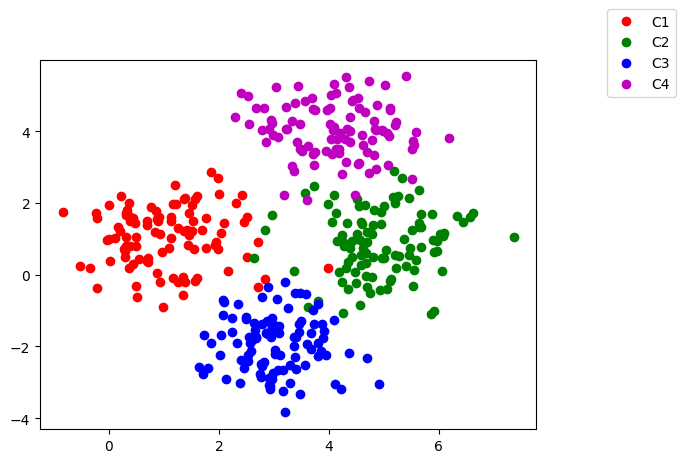

In [121]:

figure = plt.figure()
plt.plot(np_data[np.where(np_labels==0)[0],0],np_data[np.where(np_labels==0)[0],1],'ro')
plt.plot(np_data[np.where(np_labels==1)[0],0],np_data[np.where(np_labels==1)[0],1],'go')
plt.plot(np_data[np.where(np_labels==2)[0],0],np_data[np.where(np_labels==2)[0],1],'bo')
plt.plot(np_data[np.where(np_labels==3)[0],0],np_data[np.where(np_labels==3)[0],1],'mo')

figure.legend(["C1","C2","C3","C4"],bbox_to_anchor=(1, 1), loc="upper left")

plt.show()

In [122]:
kmeans(np_data ,4)

(array([[ 4.10027882,  4.03462329],
        [ 3.04544439, -1.8626835 ],
        [ 5.03549937,  0.89764511],
        [ 1.04474834,  1.09081105]]),
 array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
        3, 3, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 1, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 0, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [123]:
def cluster_error(data,k):
    centroids, labels = kmeans (data, k)
 
    errors = []
    for i in range(len(centroids)):
        cluster_points = data[labels == i]
        centroid = centroids[i]
        error = np.mean(np.linalg.norm(cluster_points - centroid, axis=1))
        errors.append(error)
    return errors

In [124]:
def error_error(data,k):
   centroids, labels = kmeans (data, k)
   return np.mean(cluster_error(data,k))

In [129]:
def inertia(data):

 iners =[]
 for i in range (2,15):
    centroids, labels = kmeans(data, i)
    iners = error_error(data , i)

    return iners
 
  

ValueError: x and y must have same first dimension, but have shapes (13,) and (1,)

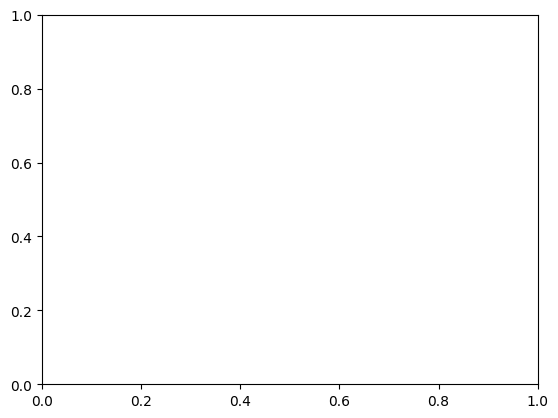

In [130]:
inertia_values = inertia(np_data)
plt.plot(range(2, 15), inertia_values , marker = 'o')
plt.show()